function LTI_System  
%% a)  
% Method 1  
% H(z) / z = 2z / (z^2 - 1.7z + 0.72)  
b = [2 0]; a = [1 -1.7 0.72];  
[r,p,k] = residue(b,a);  
N = 100; n = 0:N-1;  
h = r(1)*p(1).^n + r(2)*p(2).^n; % 18 * (0.9)^n - 16 * (0.8)^n  
figure, stem(n,h)  

% Method 2  
% H(z) = 2 / (1 - 1.7z^(-1) + 0.72z^(-2))  
b = [2]; a = [1 -1.7 0.72];  
d = [1 zeros(1,N-1)]; % length = N  
h1 = filter(b,a,d);  
figure, stem(n,h1)  

% Method 3  
h2(1) = 2; h2(2) = 3.4;  
for i = 3 : N  
    h2(i) = 1.7*h2(i-1) - 0.72*h2(i-2);  
end  
figure, stem(n, h2)  

%% b)  
x = ones(1,N);  
% H(z) = 2 / (1 - 1.7z^(-1) + 0.72z^(-2))  
b = [2]; a = [1 -1.7 0.72];  
y = filter(b,a,x)  
figure, stem(n, y)  

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import residue, lfilter

In [31]:
#Define common usage:
N = 100 #100 samples using to gather the data.
n = np.arange(0, N)

In [32]:
#a)
#Method 1
#H(z) / z = 2z / (z^2 - 1.7z + 0.72)
b = [2,0]
a = [1,-1.7,0.72]
[r,p,k] = residue(b,a)
# Compute h
h = r[0] * (p[0] ** n) + r[1] * (p[1] ** n)

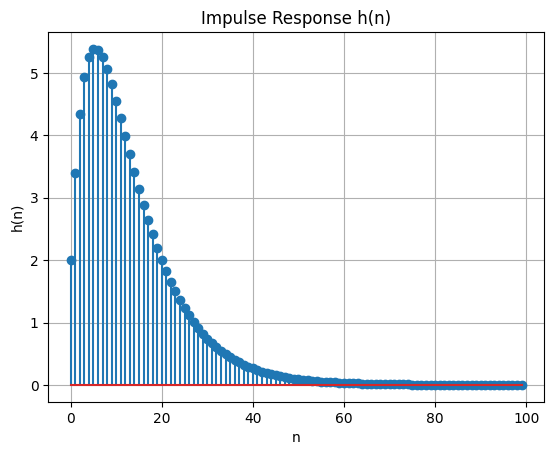

In [33]:
plt.stem(n,h)  
plt.title("Impulse Response h(n)")
plt.xlabel("n")
plt.ylabel("h(n)")
plt.grid(True)
plt.show()

In [34]:

# Method 2
# H(z) = 2 / (1 - 1.7z^(-1) + 0.72z^(-2))
b = [2]
a = [1, -1.7, 0.72]
#impulse
d = np.concatenate(([1], np.zeros(N - 1)))  # length = N
# Apply the filter using lfilter
h1 = lfilter(b, a, d)

In [35]:
# Print the computed impulse response
print("Computed Impulse Response h(n):")
print(h)

Computed Impulse Response h(n):
[2.00000000e+00 3.40000000e+00 4.34000000e+00 4.93000000e+00
 5.25620000e+00 5.38594000e+00 5.37163400e+00 5.25390100e+00
 5.06405522e+00 4.82608515e+00 4.55822500e+00 4.27420119e+00
 3.98422003e+00 3.69574919e+00 3.41413520e+00 3.14309042e+00
 2.88507638e+00 2.64160474e+00 2.41347306e+00 2.20094879e+00
 2.00391234e+00 1.82196785e+00 1.65452846e+00 1.50088153e+00
 1.36023811e+00 1.23177009e+00 1.11463771e+00 1.00800964e+00
 9.11077238e-01 8.23064365e-01 7.43233808e-01 6.70891132e-01
 6.05386582e-01 5.46115574e-01 4.92518137e-01 4.44077620e-01
 4.00318895e-01 3.60806235e-01 3.25140995e-01 2.92959203e-01
 2.63929128e-01 2.37748892e-01 2.14144144e-01 1.92865842e-01
 1.73688149e-01 1.56406446e-01 1.40835491e-01 1.26807694e-01
 1.14171526e-01 1.02790055e-01 9.25395941e-02 8.33084707e-02
 7.49958924e-02 6.75109181e-02 6.07715183e-02 5.47037201e-02
 4.92408310e-02 4.43227342e-02 3.98952498e-02 3.59095561e-02
 3.23216655e-02 2.90919509e-02 2.61847174e-02 2.35678

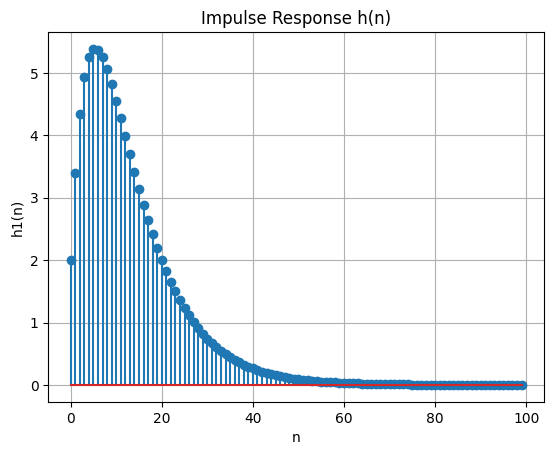

In [36]:
# Plot the impulse response using stem
plt.stem(n, h1)
plt.title("Impulse Response h(n)")
plt.xlabel("n")
plt.ylabel("h1(n)")
plt.grid(True)
plt.show()

In [37]:
#Method 3
h2 = np.zeros(N)
h2[0] = 2
h2[1] = 3.4

for i in range(2, N):
    h2[i] = 1.7 * h2[i - 1] - 0.72 * h2[i - 2]


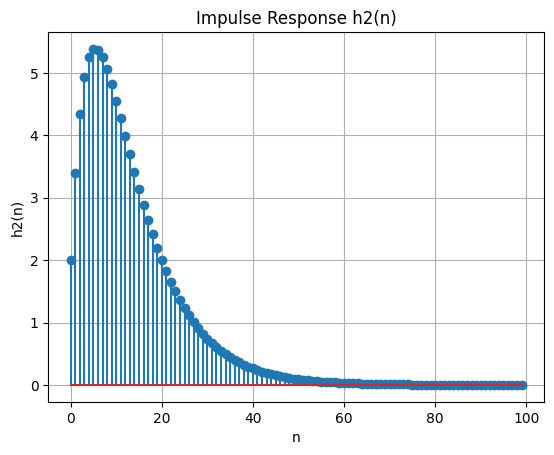

In [38]:
# Plot the impulse response using stem
plt.stem(n, h2)
plt.title("Impulse Response h2(n)")
plt.xlabel("n")
plt.ylabel("h2(n)")
plt.grid(True)
plt.show()